# Capítulo 9: Técnicas de Aprendizaje No Supervisado

## Técnicas de Aprendizaje No Supervisado — Qué son y para qué sirven

---

## 1. Clustering
**Qué es:**  
Una familia de técnicas de aprendizaje no supervisado que agrupan datos según su similitud, sin usar etiquetas.

**Para qué sirve:**  
- Descubrir patrones ocultos en los datos.  
- Dividir poblaciones en segmentos naturales.  
- Preprocesar datos para otros modelos de ML.

---

### 1.1 K-Means
**Qué es:**  
Un algoritmo que divide los datos en *k* grupos, asignando cada punto al centroide más cercano y actualizando dichos centroides iterativamente.

**Para qué sirve:**  
- Agrupar datos de manera simple y eficiente.  
- Segmentar clientes, imágenes, documentos, etc.  
- Encontrar estructuras esféricas o bien separadas.

---

### 1.2 Mini-Batch K-Means
**Qué es:**  
Una variante de K-Means que usa muestras pequeñas (mini-batches) para actualizar los centroides.

**Para qué sirve:**  
- Escalar K-Means a grandes volúmenes de datos.  
- Reducir tiempo de entrenamiento manteniendo buena calidad del clustering.

---

### 1.3 Segmentación de Imágenes
**Qué es:**  
Una aplicación de clustering donde los píxeles se agrupan por similitud de color o ubicación.

**Para qué sirve:**  
- Simplificar imágenes dividiéndolas en regiones.  
- Preprocesar imágenes para visión artificial.  
- Detectar objetos o patrones visuales.

---

### 1.4 Clustering con Preprocesamiento
**Qué es:**  
El uso de técnicas como normalización, escalado o reducción de dimensionalidad antes de aplicar clustering.

**Para qué sirve:**  
- Mejorar resultados cuando las características tienen escalas diferentes.  
- Reducir ruido y capturar estructura relevante antes de agrupar.

---

### 1.5 DBSCAN
**Qué es:**  
Un algoritmo de clustering basado en densidad que agrupa puntos densamente conectados y detecta ruido/anomalías de forma natural.

**Para qué sirve:**  
- Descubrir grupos de forma arbitraria (no requiere k).  
- Funcionamiento robusto ante outliers.  
- Útil cuando hay regiones densas mezcladas con ruido.

---

## 2. Mezclas Gaussianas (Gaussian Mixture Models, GMM)
**Qué es:**  
Un modelo probabilístico que representa los datos como una mezcla de distribuciones gaussianas, permitiendo clusters suaves y superpuestos.

**Para qué sirve:**  
- Clustering cuando los datos no se separan claramente.  
- Modelar densidades complejas.  
- Asignar pertenencia probabilística a cada cluster.

---

### 2.1 Detección de Anomalías con GMM
**Qué es:**  
El uso de la probabilidad de cada punto según el modelo: valores muy improbables se consideran anomalías.

**Para qué sirve:**  
- Detectar comportamientos inusuales o sospechosos.  
- Monitorizar sistemas, fraudes o fallos operativos.

---

### 2.2 Modelo Bayesiano de Mezclas Gaussianas
**Qué es:**  
Una variante de GMM que usa métodos bayesianos para determinar automáticamente el número efectivo de componentes.

**Para qué sirve:**  
- Evitar elegir manualmente el número de clusters.  
- Modelar datos con estructura compleja y variable.  


In [1]:
#Pandas, Numpy, Matplotlib, Os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

## <span style="color:green">1. Clustering</span>

#### <span style="color:blue"> 1.1 K-means</span>

K-Means es uno de los algoritmos de clustering más sencillo de utilizar, aunque tiene sus limitaciones.

Los datos tienen que estar: relativamente cirulares y poseer grupos de tamaños similares

In [3]:
from sklearn.datasets import make_blobs

# Generar un set de datos para clustering
X, y = make_blobs(n_samples=100, centers=4)


In [ ]:
from sklearn.cluster import KMeans

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo a los datos
kmeans.fit(X)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

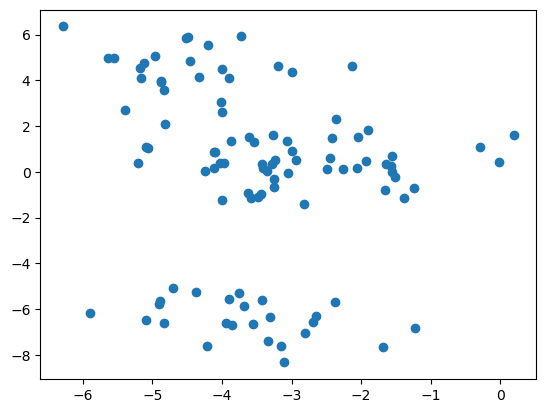

In [5]:
import matplotlib.pyplot as plt

# Visualizar una parte de los datos
plt.scatter(X[:100, 0], X[:100, 1])
plt.show()


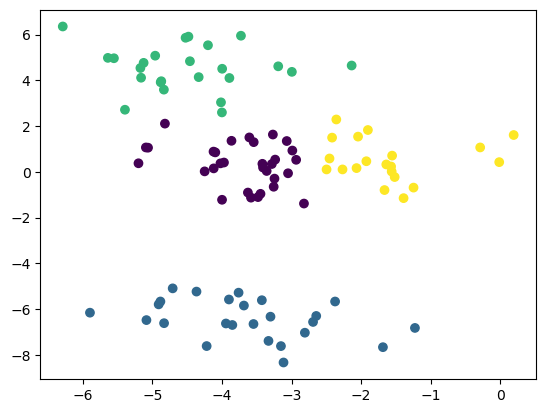

In [7]:
# Obtener los clusters asignados por K-Means
clusters = kmeans.predict(X)

# Visualizar los datos y su cluster
plt.scatter(X[:100, 0], X[:100, 1], c=clusters[:100], cmap='viridis')
plt.show()


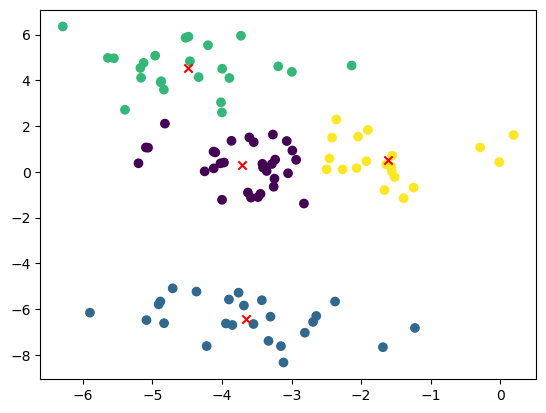

In [8]:
# Obtener los centros de los clusters
centros = kmeans.cluster_centers_

# Visualizar datos y centros de los clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.scatter(centros[:, 0], centros[:, 1], c='red', marker='x')
plt.show()


In [9]:
# Calcular la distancia de cada punto a cada centroide
distancias = kmeans.transform(X)

# Visualizar las distancias de algunas instancias
distancias[:5]


array([[ 6.69808169,  1.01679028, 11.00406762,  6.88452739],
       [ 2.74481368,  9.47444654,  1.58167255,  3.49380178],
       [ 1.29251858,  7.11457712,  4.45609343,  0.84891607],
       [ 1.44531636,  5.30030805,  5.74767231,  2.56197622],
       [ 1.06704076,  5.7901328 ,  5.34352743,  2.01307181]])

***

In [10]:
centroides_iniciales = np.array([[-2, 0],[0, 2],[2, 0],[0, -2]])


In [11]:
# Crear K-Means con centroides iniciales personalizados
kmeans = KMeans(n_clusters=4,init=centroides_iniciales,n_init=1,)
kmeans.fit(X)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init=array([[-2,  0],
       [ 0,  2],
       [ 2,  0],
       [ 0, -2]]),
       n_clusters=4, n_init=1)

In [14]:
predicciones = kmeans.predict(X)
predicciones[:10]


array([3, 1, 0, 0, 0, 0, 0, 1, 2, 3])

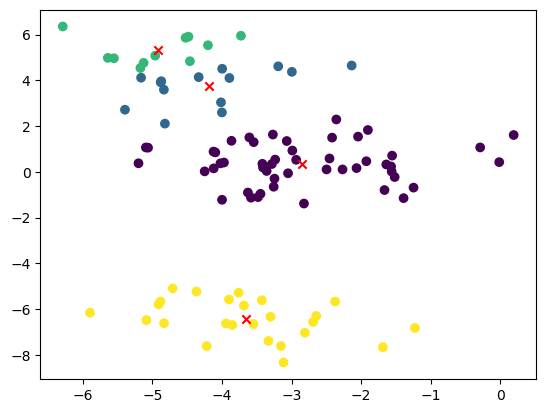

In [15]:
# Obtener los centros de los clusters
centros = kmeans.cluster_centers_

# Visualizar los datos y los centros
plt.scatter(X[:, 0], X[:, 1], c=predicciones, cmap='viridis')
plt.scatter(centros[:, 0], centros[:, 1], c='red', marker='x')
plt.show()


In [16]:
# Inercia del K-Means (suma de distancias al cuadrado a los centroides)
inercia = kmeans.inertia_
inercia


188.01289708499365

In [17]:
# Puntaje del K-Means (inversa de la suma de distancias al cuadrado promedio)
puntaje = kmeans.score(X)
puntaje


-188.01289708499365

***

#### <span style="color:blue"> 1.2 Mini-Batch K-Means</span>

Es básicamente el mismo algoritmo de K-Means pero corre los datos en pequeños lotes. Esto es ideal para datos en línea o bases de datos extensas. 

Aunque da resultados similares al K-Means, pierdes fidelidad

In [18]:
from sklearn.cluster import MiniBatchKMeans

# Crear el modelo MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=4,batch_size=50,)

# Ajustar el modelo a los datos
minibatch_kmeans.fit(X)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 512 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=50, n_clusters=4)

In [19]:
# Puntaje del MiniBatchKMeans
puntaje_mb = minibatch_kmeans.score(X)
puntaje_mb


-154.28967525773322

***

In [20]:
kmeans_limpio = KMeans(n_clusters=4)

kmeans_limpio.fit(X)
kmeans_limpio.inertia_



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


153.65117866653964

In [21]:
inercias = []

# Probar K-Means con k de 1 a 9
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(X)
    inercias.append(km.inertia_)

inercias


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[1777.923443680289,
 532.4709519949224,
 207.1419538424562,
 165.33535913027566,
 131.36924493235495,
 122.12562610474563,
 97.90163820741427,
 87.08159842158237,
 81.80037055503547]

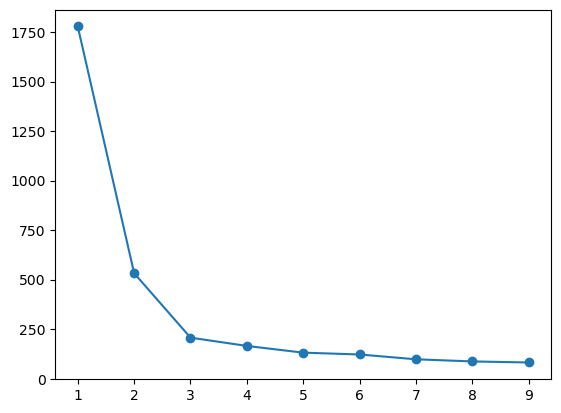

In [23]:
# Definir los ejes
x2 = list(range(1, 10))  # número de clusters
y2 = inercias             # inercia calculada previamente

# Graficar inercia vs número de clusters
plt.plot(x2, y2, marker='o')
plt.show()


In [25]:
from sklearn.metrics import silhouette_score

# Obtener las predicciones del K-Means limpio
predicciones = kmeans.predict(X)

# Calcular el coeficiente de silueta
silhouette = silhouette_score(X, predicciones)
silhouette


0.5168539866101276

In [26]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Ejecutar K-Means para k de 2 a 9
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(X)
    labels = km.predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

silhouette_scores


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[0.6551464336892738,
 0.6233737216918428,
 0.5290770807280798,
 0.48603893387151975,
 0.43816290722866796,
 0.3325804871635247,
 0.3341569154733221,
 0.36614308043611987]

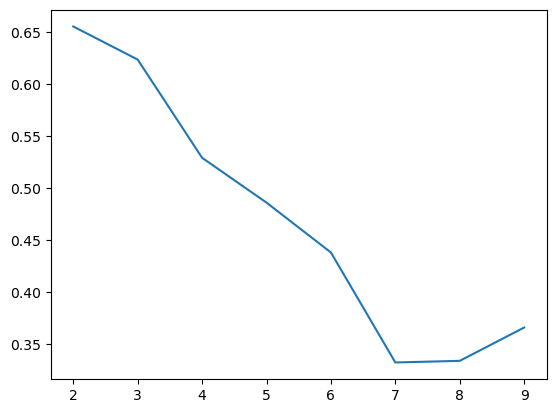

In [29]:
plt.plot(list(range(2, 10)), silhouette_scores)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para n_clusters = 2, la media de silhouette_score es: 0.655


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para n_clusters = 3, la media de silhouette_score es: 0.623


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para n_clusters = 4, la media de silhouette_score es: 0.475


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para n_clusters = 5, la media de silhouette_score es: 0.439


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Para n_clusters = 6, la media de silhouette_score es: 0.441


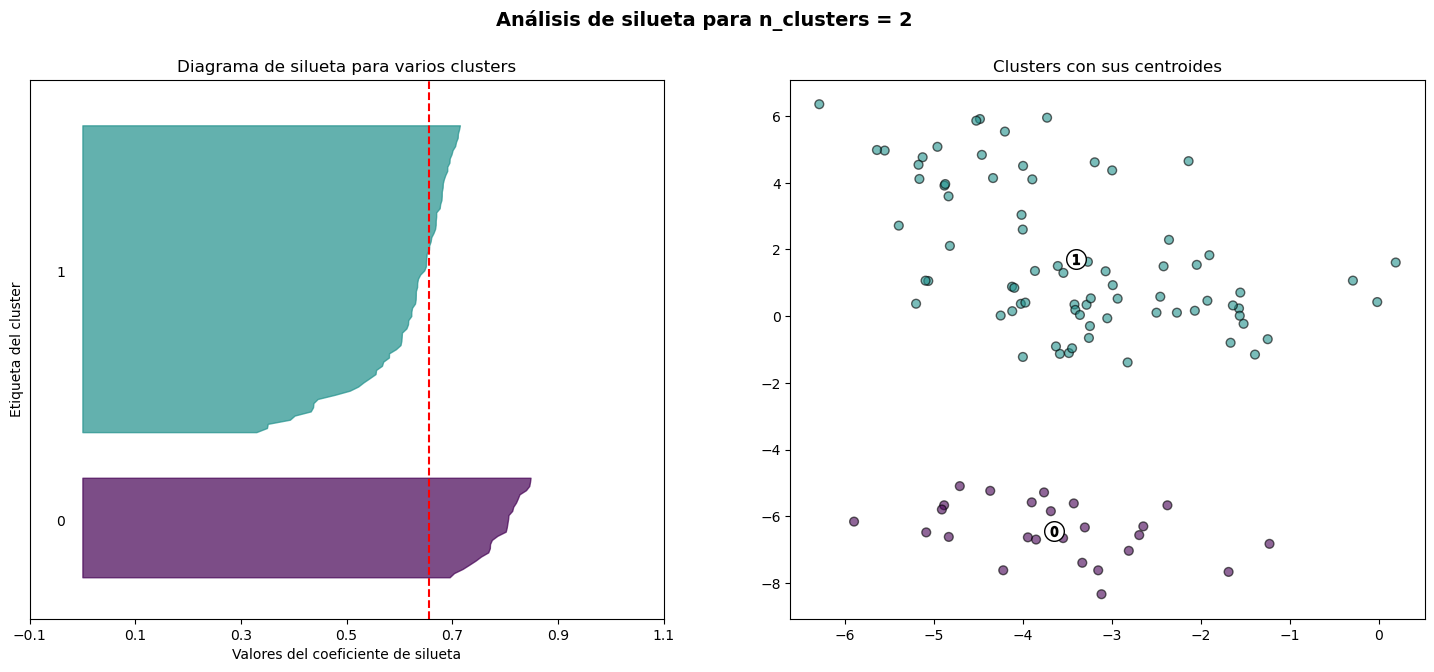

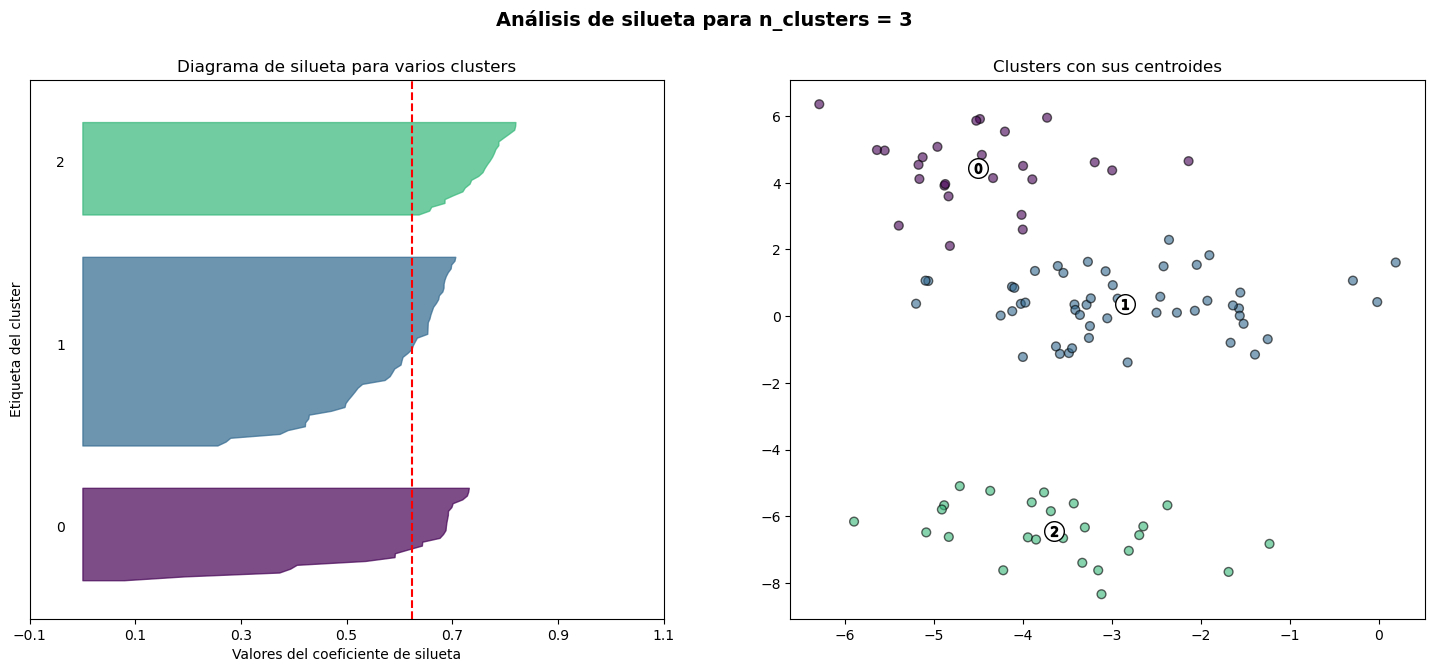

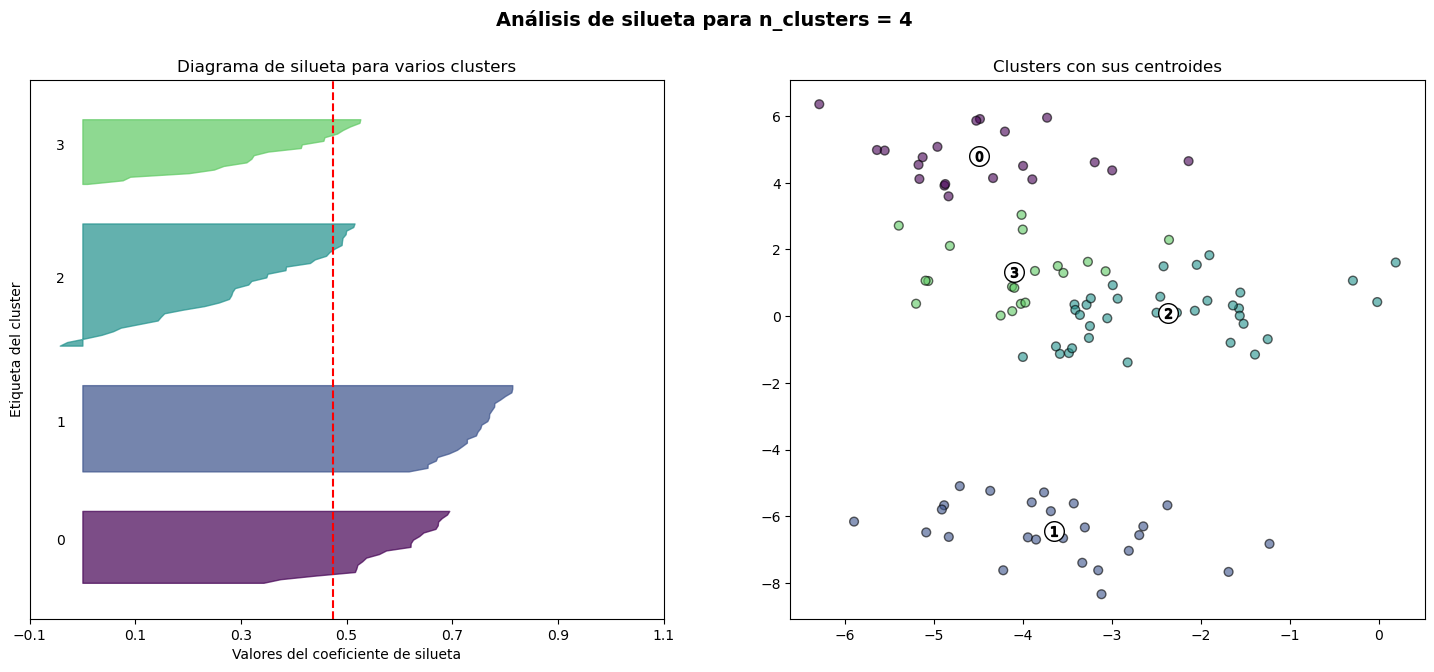

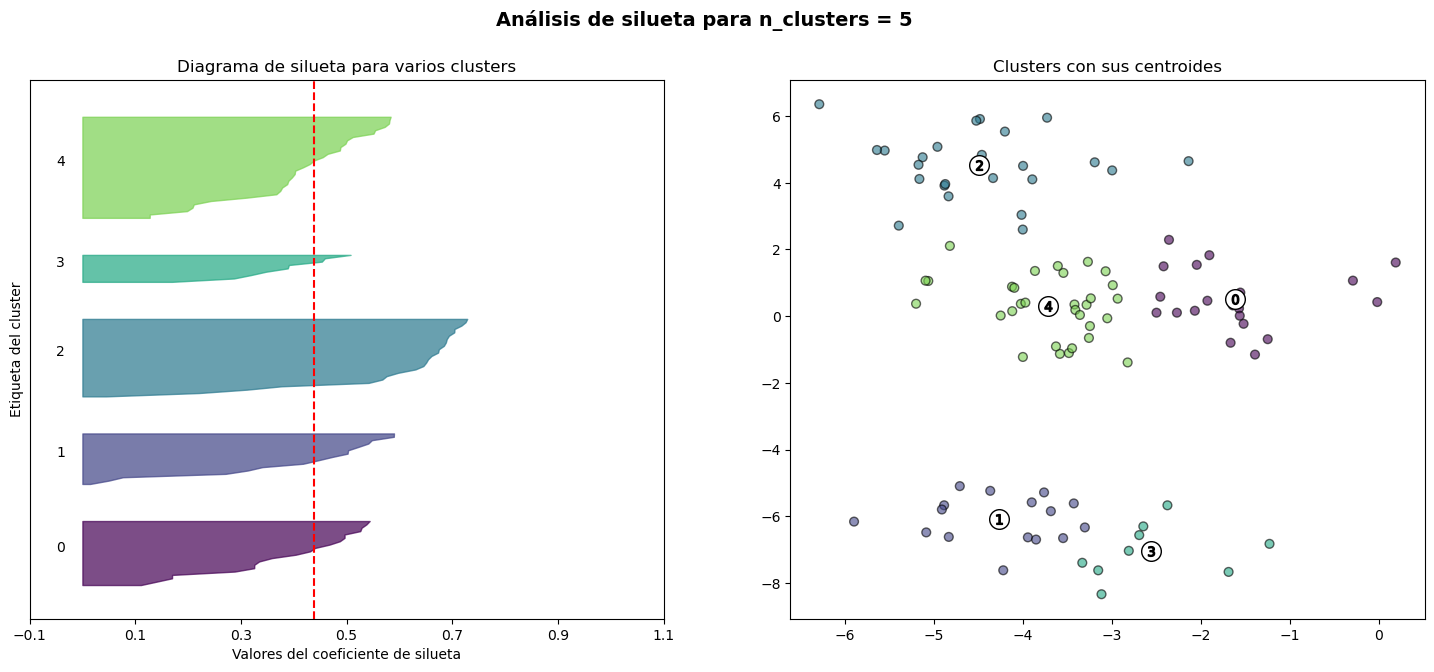

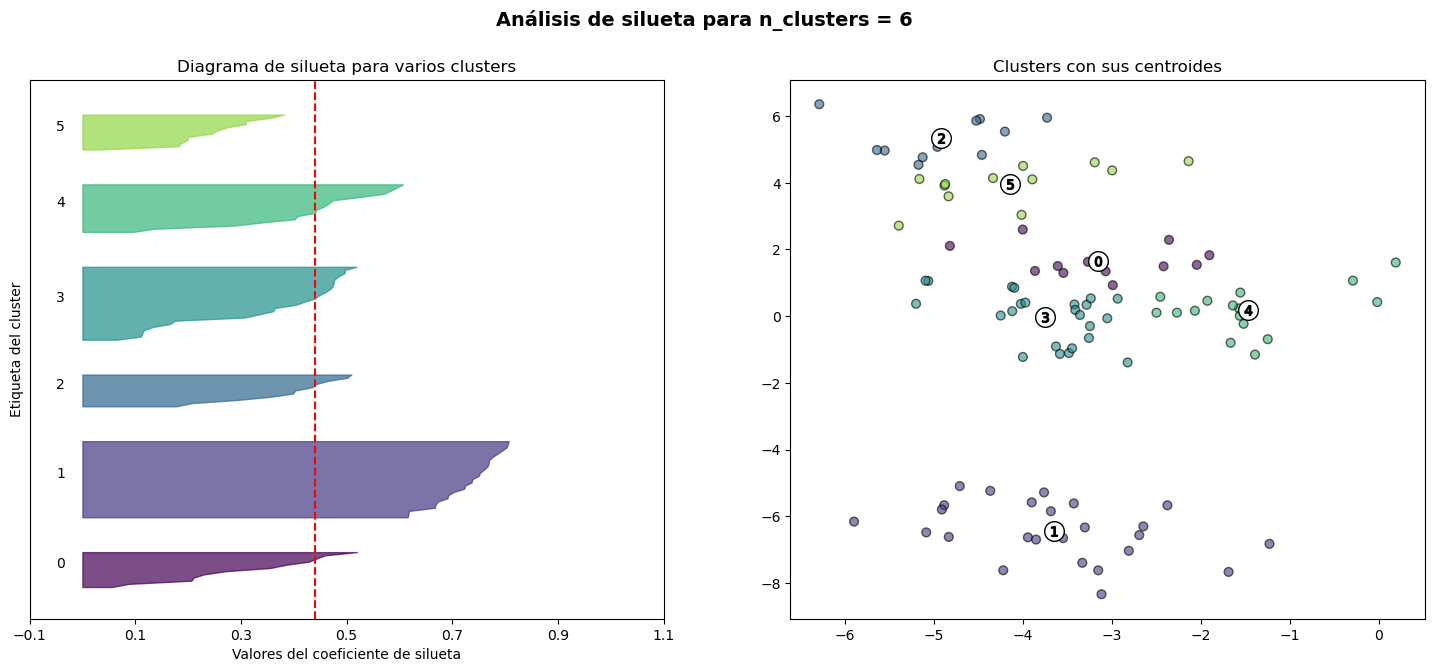

In [31]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # K-Means sin random_state
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, la media de silhouette_score es: {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.viridis(float(i) / n_clusters)  # Cambio de colormap
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Diagrama de silueta para varios clusters")
    ax1.set_xlabel("Valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta del cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    colors = cm.viridis(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker="o", s=40, alpha=0.6, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k"
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("Clusters con sus centroides")

    plt.suptitle(
        f"Análisis de silueta para n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()


***

#### <span style="color:blue"> 1.3 Segmentación de Imágenes</span>

La segmentación de imágenes es un ejemplo de aplicación del clustering. 


Existen diferentes niveles de segmentación, entre ellos está la segmentación semántica, segmentación por instancia y segmentación de imágenes por color.

In [33]:
from matplotlib.image import imread

imagen = imread("tenis.jpg")
imagen.shape


(263, 496, 3)

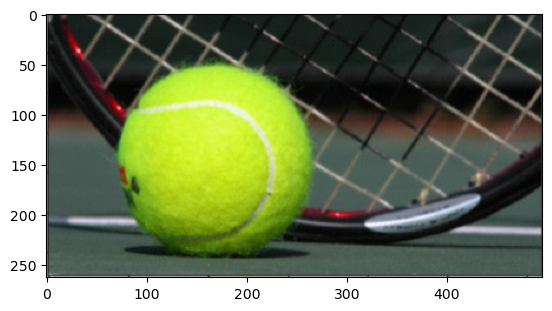

In [34]:
#Muestra la imagen
plt.imshow(imagen)

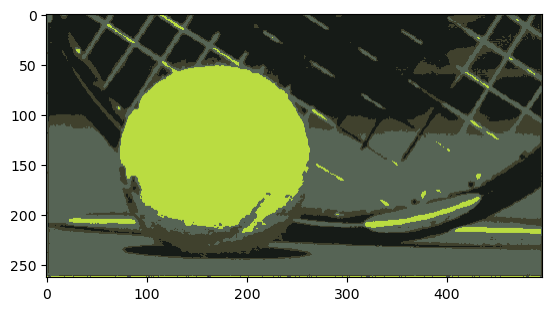

In [37]:
# Obtener los centros (colores)
centers = np.uint8(kmeans.cluster_centers_)

# Asignar a cada píxel su centro correspondiente
segmented_data = centers[labels]

# Volver a la forma original de la imagen
segmented_image = segmented_data.reshape(imagen.shape)

# Mostrar la imagen segmentada
plt.imshow(segmented_image)


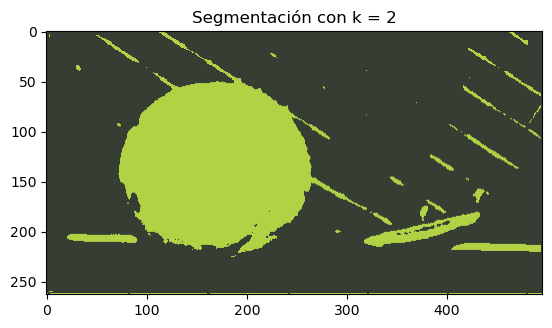

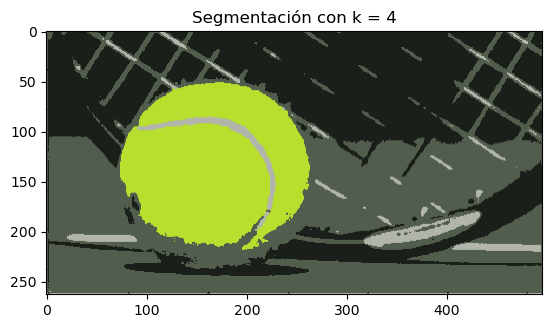

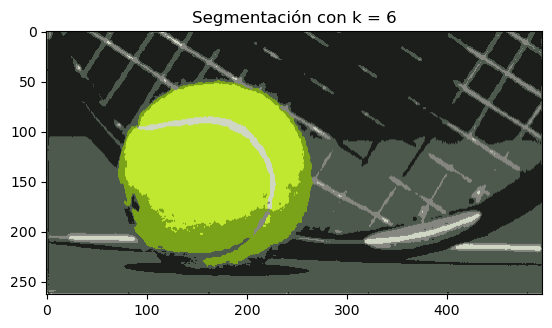

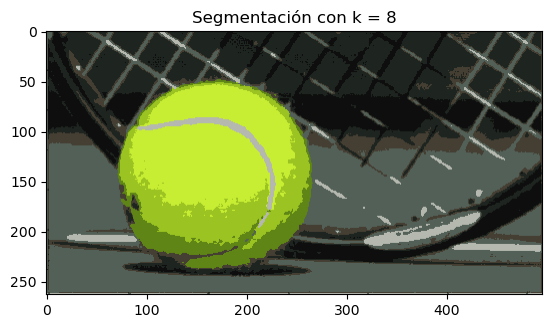

In [39]:

X_img = imagen.reshape(-1, 3)

# Probar distintos valores de k
for k in [2, 4, 6, 8]:
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_img)

    labels = kmeans.labels_
    centers = np.uint8(kmeans.cluster_centers_)

    segmented_data = centers[labels]
    segmented_image = segmented_data.reshape(imagen.shape)

    plt.figure()
    plt.title(f"Segmentación con k = {k}")
    plt.imshow(segmented_image)

plt.show()


***

#### <span style="color:blue"> 1.4 Clustering con Preprocesamiento</span>

In [40]:
# Importa los dígitos de MNIST desde Sklearn
from sklearn.datasets import load_digits

digits = load_digits()
x = digits.data
y = digits.target


In [41]:
#Importa train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)


In [43]:
# Arma una regresión logística
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000)
log.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
#Despliega el puntaje de la regresión (log.score)
log.score(x_test, y_test)

0.9644444444444444

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(max_iter=1000))
])

pipeline.fit(x_train, y_train)



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=1000))])

In [ ]:
# Puntaje del modelo
pipeline.score(x_test, y_test)

0.9711111111111111

In [47]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a probar (número de clusters en K-Means)
param_grid = {
    "kmeans__n_clusters": [10, 20, 30, 40, 50]
}

# Crear el GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="accuracy")

# Ajustar el GridSearch
grid_search.fit(x_train, y_train)

# Mejor número de clusters y mejor score
print("Mejor número de clusters:", grid_search.best_params_["kmeans__n_clusters"])
print("Mejor puntaje:", grid_search.best_score_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mejor número de clusters: 40
Mejor puntaje: 0.9643652561247217


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***

#### <span style="color:blue"> 1.4 DBSCAN</span>

Puede funcionar cuando K-Means esta limitado. Este algoritmo define los clusters como regiones continuas de alta densidad.

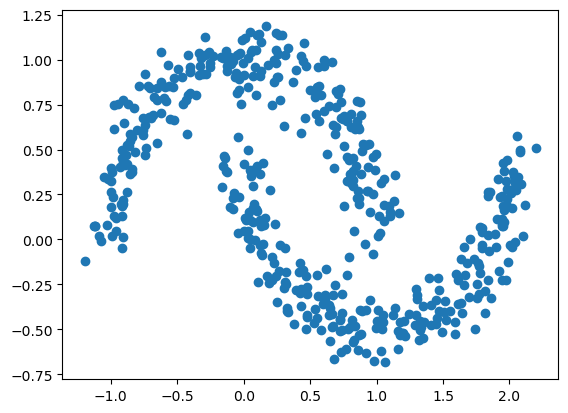

In [48]:
# Importamos librerías
from sklearn.datasets import make_moons


# Creamos el set de datos
x, y = make_moons(n_samples=500, noise=0.1)

plt.scatter(x[:,0], x[:,1])
plt.show()


In [49]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan.fit(x)


DBSCAN(eps=0.1, min_samples=10)

In [50]:
dbscan.labels_

array([-1,  0,  0,  1, -1,  2,  8, -1,  3, -1, -1, -1, -1, -1,  4,  2,  5,
        1,  6, -1,  7, 10,  1, -1,  6, -1,  7, -1, -1, -1, -1,  0, -1,  6,
        3, 10,  6, -1, -1,  6, -1,  1,  4,  6, -1,  4,  7,  6, -1, -1,  1,
        3,  6,  6, -1, -1, -1, -1,  6,  7,  0,  6, -1,  7, -1, 10, -1,  1,
       10, -1, -1, -1,  6,  0,  6,  6, -1,  1, -1, -1,  1,  6,  4, -1,  1,
       -1, -1,  1,  0,  5,  1, 10, -1,  6, -1, -1, -1,  3,  0, -1,  9,  2,
       -1, -1,  5, -1, -1, -1, 11, -1, -1,  8,  2,  9,  0, -1,  9,  6, -1,
       -1, -1, -1,  1,  0,  2, -1, -1, -1,  1, -1, -1,  6, -1,  4,  5,  7,
        8,  2,  1, -1,  2,  6,  2,  2,  1,  3,  2, -1, -1, -1, -1,  8,  1,
       -1, -1, -1,  6, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1,  3,
        5,  1, -1,  2, -1,  3, -1, -1, -1,  2, -1,  5, -1, -1,  4,  2,  3,
        1,  9,  2, -1,  1,  5, -1, -1, -1, -1,  5,  6, -1, -1, -1, -1,  4,
       -1,  2, -1, -1,  8, -1,  4,  7, -1, -1, -1,  7,  1,  1,  6, -1, 11,
        3,  9,  6,  2,  3

In [51]:
# Modifica el parámetro epsilon del algoritmo DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(x)


DBSCAN(eps=0.15)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(n_neighbors=30)

In [53]:
puntos_nuevos = np.random.rand(5, 2)
predicciones = knn.predict(puntos_nuevos)
predicciones


array([1, 1, 1, 1, 1], dtype=int64)

***

### <span style="color:green"> 2. Mezclas Gaussianas</span>

Las Mezclas Gaussianas es la manera más robusta de hacer clusters pero, también es la más pesada.

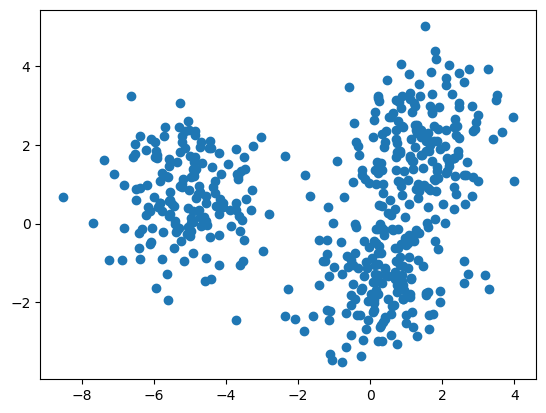

In [54]:
# Importa librerías
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=3, cluster_std=1.0)

# Graficamos los datos
plt.scatter(X[:,0], X[:,1])
plt.show()


In [55]:
# Importa GaussianMixture de Sklearn
from sklearn.mixture import GaussianMixture


In [56]:
# Genera GaussianMixture especificando n_components y n_init
gmm = GaussianMixture(n_components=3, n_init=5)
gmm.fit(X)


GaussianMixture(n_components=3, n_init=5)

In [57]:

gmm.weights_

array([0.33151201, 0.34465881, 0.32382918])

In [58]:
# Obtén las medias de los clusters
gmm.means_


array([[-5.05740733,  0.70651407],
       [ 1.38862752,  2.0096691 ],
       [ 0.34333583, -1.34332806]])

In [59]:
# Obtén la matriz de covarianzas de los clusters
gmm.covariances_


array([[[ 1.1261534 , -0.02874961],
        [-0.02874961,  1.09655794]],

       [[ 1.02842246,  0.17622178],
        [ 0.17622178,  1.08963931]],

       [[ 1.03540557,  0.17719597],
        [ 0.17719597,  0.97643245]]])

In [60]:
# Verifica si el modelo convergió
gmm.converged_


True

In [62]:
# Obtén el número de iteraciones del modelo
gmm.n_iter_


3

In [63]:
# Predice el cluster de los primeros 5 datos
gmm.predict(X[:5])


array([0, 2, 2, 0, 1], dtype=int64)

In [67]:
# Obtén las probabilidades de pertenencia a cada cluster de todos los datos
gmm.predict_proba(X)


array([[9.99947752e-01, 6.30142093e-06, 4.59470456e-05],
       [4.19148373e-07, 1.61317325e-04, 9.99838264e-01],
       [8.38104314e-09, 6.17758862e-03, 9.93822403e-01],
       ...,
       [1.69347460e-02, 3.65494550e-01, 6.17570704e-01],
       [9.99999977e-01, 2.55173927e-10, 2.26510371e-08],
       [1.75848024e-06, 1.09776232e-02, 9.89020618e-01]])

In [72]:
# Genera nuevos datos para evaluar la eficiencia del clasificador
x_nuevo, y_nuevo = gmm.sample(10)


In [73]:
# Despliega los datos nuevos de X
x_nuevo


array([[-3.9733696 , -0.65296577],
       [-4.12140943,  0.26183618],
       [-4.55980898,  2.24086239],
       [-5.30601994, -0.03985306],
       [ 2.47859731,  3.05970873],
       [ 0.81171103,  1.89432561],
       [ 1.05527084,  0.06356996],
       [-0.07421269, -0.92217049],
       [ 0.68211035, -2.69906803],
       [ 0.13424667, -0.36124057]])

In [74]:
# Clasifica los nuevos datos
gmm.predict(x_nuevo)


array([0, 0, 0, 0, 1, 1, 2, 2, 2, 2], dtype=int64)

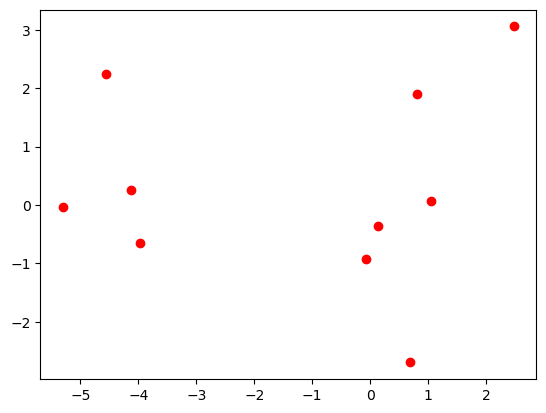

In [75]:
plt.scatter(x_nuevo[:,0], x_nuevo[:,1], color='red')
plt.show()


***

Las anomalías son cualquier dato que se encuentre fuera de la zona de alta densidad.

In [76]:
# Obtén los puntajes de cada muestra
gmm.score_samples(X)


array([-3.90196281, -3.60176274, -3.28135692, -5.01570244, -3.50715855,
       -4.48974298, -3.41665202, -4.58688862, -3.4223724 , -3.61559091,
       -4.36574885, -3.92761544, -3.84077065, -3.64177978, -3.87531419,
       -3.99629781, -4.02779354, -3.13763824, -3.30151408, -3.05799747,
       -3.96109832, -4.37029094, -3.47639728, -3.03024444, -3.40560611,
       -4.5774345 , -3.84881451, -3.16659684, -4.09323411, -3.41461812,
       -5.81832901, -3.01325085, -3.77389996, -2.97793104, -6.90770556,
       -3.32671971, -5.96325108, -4.70190067, -4.31924094, -4.60188399,
       -3.3371972 , -3.11546123, -3.51908235, -2.98832356, -3.89941102,
       -4.58007344, -3.55378591, -3.23385587, -3.23036495, -3.15704192,
       -4.51524745, -4.98220576, -4.03735375, -3.6663785 , -3.14877128,
       -3.92270957, -3.52449307, -3.011258  , -3.14611178, -3.65993143,
       -3.47028914, -3.68466605, -4.3277638 , -4.16614274, -3.51228944,
       -3.41757167, -3.36997469, -4.26877721, -4.19357077, -3.05

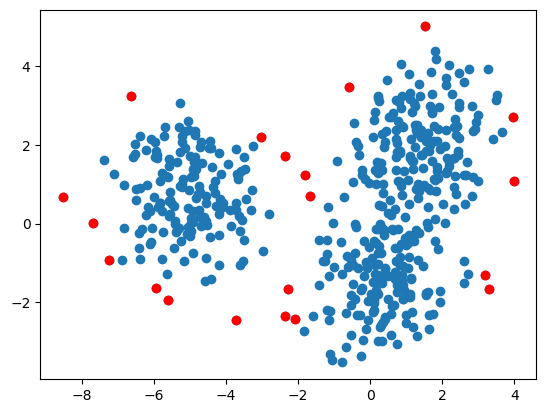

In [77]:

puntajes = gmm.score_samples(X)
percentiles = np.percentile(puntajes, 4)  
anomalías = X[puntajes < percentiles]

plt.scatter(X[:,0], X[:,1], label='Datos normales')
plt.scatter(anomalías[:,0], anomalías[:,1], color='red', label='Anomalías')
plt.show()


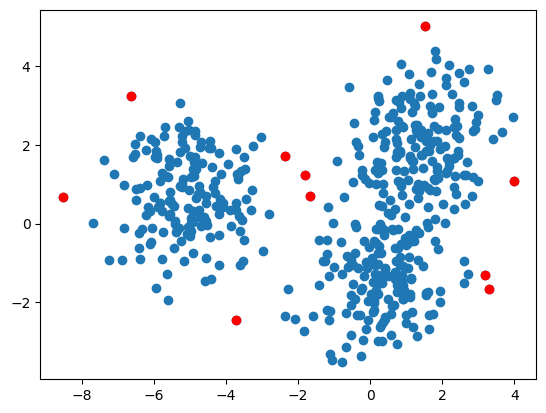

In [78]:
percentiles = np.percentile(puntajes, 2)
anomalías = X[puntajes < percentiles]
plt.scatter(X[:,0], X[:,1], label='Datos normales')
plt.scatter(anomalías[:,0], anomalías[:,1], color='red', label='Anomalías')
plt.show()


***

#### <span style="color:blue"> 2.1 Detección de Anomalías</span>


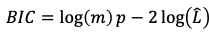

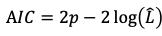

m=número de instancias
p=número de parámetros 
L= Verosimilitud

In [80]:
# Calcula el BIC para los datos
print(gmm.bic(X))

# Calcula el AIC para los datos
print(gmm.aic(X))


4002.6670636297254
3931.018725956548


In [81]:
componentes = [1, 2, 3, 4, 5]

# Guardamos los BIC de cada modelo
bic_scores = []

for n in componentes:
    gmm_test = GaussianMixture(n_components=n, n_init=5, random_state=42)
    gmm_test.fit(X)
    bic_scores.append(gmm_test.bic(X))

# Mostramos los resultados
for n, bic in zip(componentes, bic_scores):
    print(f"n_components={n}, BIC={bic}")

# Seleccionamos el mejor modelo según BIC (el menor)
mejor_n = componentes[np.argmin(bic_scores)]
print(f"El mejor número de componentes según BIC es: {mejor_n}")


n_components=1, BIC=4511.507010328982
n_components=2, BIC=4025.931813948173
n_components=3, BIC=4002.6670636297254
n_components=4, BIC=4036.5424229096097
n_components=5, BIC=4071.708308080625
El mejor número de componentes según BIC es: 3


***

#### <span style="color:blue"> 2.2 Modelo Bayesiano de Mezclas Gaussianas</span>

La única labor en este modelo es adivinar un número de clusters mayor al óptimo. 


Ojo: a los clusters que no sirven simplemente se les asignará el valor 0

In [82]:
# Importa BayesianGaussianMixture
from sklearn.mixture import BayesianGaussianMixture


In [84]:
# Crea el modelo y asigna la cantidad de clusters
bgmm = BayesianGaussianMixture(n_components=5, n_init=5)
bgmm.fit(X)


BayesianGaussianMixture(n_components=5, n_init=5)

In [85]:
np.round(bgmm.weights_, 2)

array([0.36, 0.33, 0.31, 0.  , 0.  ])